In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [14]:
df = pd.read_excel('https://cdn.theforage.com/vinternships/companyassets/4sLyCPgmsy8DA6Dh3/02%20Churn-Dataset.xlsx')

<font face='Timos'><h1> 1. Data Exploration

<font face='Timos'><h2> 1.1 Understand Data

<font face = 'timos'>
The Customer Churn dataset contains <b>7043</b> rows and <b>23</b> columns with missing values before cleaning.<br>
    <ul><li>customerID: Exhibiting unique entries without any missing values or duplicates.</li>
        <li>gender: Categorical Variable, encompasses 2 distinct categories. No missing values are present in this column, and no changes have been applied.</li>
        <li>SeniorCitizen: Categorical Variable,  encompasses 2 distinct categories. No missing values are present in this column, and no changes have been applied.</li>
        <li>Partner: Categorical Variable,  encompasses 2 distinct categories. No missing values are present in this column, and no changes have been applied.</li>
        <li>Dependents: Categorical Variable,  encompasses 2 distinct categories.  No missing values are present in this column, and no changes have been applied.</li>
        <li>PhoneService:  Categorical Variable,  encompasses 2 distinct categories.  No missing values are present in this column, and no changes have been applied.</li>
        <li>MultipleLines:  Categorical Variable,  encompasses 3 distinct categories.  No missing values are present in this column, and no changes have been applied.</li>
        <li>OnlineSecurity:  Categorical Variable,  encompasses 3 distinct categories. No missing values are present in this column, and no changes have been applied.</li>
        <li>OnlineBackup:  Categorical Variable,  encompasses 3 distinct categories. No missing values are present in this column, and no changes have been applied.</li>
        <li>DeviceProtection:  Categorical Variable,  encompasses 3 distinct categories. No missing values are present in this column, and no changes have been applied.</li>
        <li>TechSupport:  Categorical Variable,  encompasses 3 distinct categories. No missing values are present in this column, and no changes have been applied.</li>
        <li>StreamingTV:  Categorical Variable,  encompasses 3 distinct categories. No missing values are present in this column, and no changes have been applied.</li>
        <li>StreamingMovies:  Categorical Variable,  encompasses 3 distinct categories. No missing values are present in this column, and no changes have been applied.</li>
        <li>Contract:  Categorical Variable,  encompasses 3 distinct categories. No missing values are present in this column, and no changes have been applied.</li>
        <li>PaperlessBilling:  Categorical Variable,  encompasses 2 distinct categories.  No missing values are present in this column, and no changes have been applied.</li>
        <li>PaymentMethod:  Categorical Variable,  encompasses 4 distinct categories.  No missing values are present in this column, and no changes have been applied.</li>
         <li>tenure: Numerical Variable, ranges between 0 and 72. No missing values are present in this column, and no changes have been applied.</li>
        <li>MonthlyCharges:  Numerical Variable, ranges between 18.25 and 118.25. No missing values are present in this column, and no changes have been applied.</li>
        <li>TotalCharges:  Numerical Variable, ranges between 18.8 and 8684.8. No missing values are present in this column, and no changes have been applied.</li>
        <li>numAdminTickets:  Numerical Variable, ranges between 0 and 5. No missing values are present in this column, and no changes have been applied.</li>
        <li>numTechTickets:  Numerical Variable, ranges between 0 and 9. No missing values are present in this column, and no changes have been applied.</li>
        <li>Churn: Categorical Variable,  encompasses 2 distinct categories.  No missing values are present in this column, and no changes have been applied.</li>
    </ul>
After the data validation, the dataset contains <b>7043</b> rows and <b>23</b>  columns.

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [16]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.5,0,0,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,0,0,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,3,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,0,0,Yes


In [17]:
df['Churned'] = df['Churn'].map({'Yes':1, 'No':0})

In [18]:
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)
df['TotalCharges'] = df['TotalCharges'].astype('float')

In [25]:
df = df.dropna()

In [26]:
features = df.drop(axis = 1, columns=['customerID', 'Churn', 'Churned'])

In [27]:
target = df['Churned']

In [28]:
X = pd.get_dummies(features, drop_first = True)

In [29]:
X = X.values

In [30]:
y = target.values

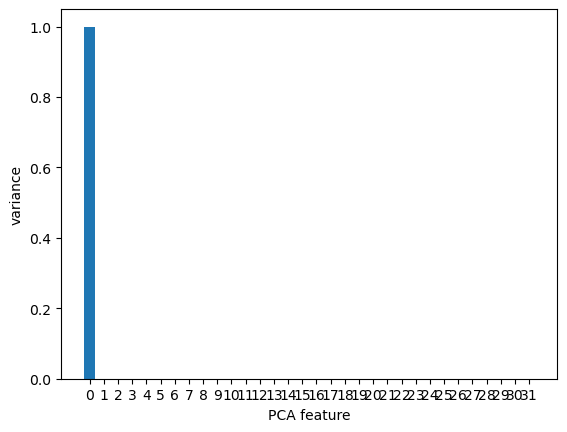

,index,feature_importance
0,0,9.998598e-01
1,1,1.222303e-04
2,2,1.667897e-05
3,3,3.160315e-07
4,4,2.804588e-07


In [31]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X)

features = range(pca.n_components_)
plt.bar(features[:50], pca.explained_variance_ratio_[:50])
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

feature_importances = pd.DataFrame({"feature_importance" : pca.explained_variance_ratio_}).reset_index()
feature_importances = feature_importances.sort_values(by=["feature_importance"], ascending=False)
feature_importances.head()

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Assuming you have already defined X and y

models = {
    "Random Forest": RandomForestClassifier(random_state=28),
    "Gradient Boosting": GradientBoostingClassifier(random_state=28)
}

feature_importance = {
    'model': [],
    'value': [],
    'feature_no': []
}

for model_name, model_instance in models.items():
    model_instance.fit(X, y)
    importances = model_instance.feature_importances_
    for i, importance in enumerate(importances):
        feature_importance['model'].append(model_name)
        feature_importance['value'].append(importance)
        feature_importance['feature_no'].append(i)

In [33]:
feature_importance_rf_gb = pd.DataFrame({'model':feature_importance['model'],\
                          'value': feature_importance['value'],\
                            'feature_no': feature_importance['feature_no']
                            })

In [34]:
feature_importance_rf_gb = feature_importance_rf_gb.sort_values(by=['value'], ascending=False)

In [35]:
feature_importance_rf_gb

,model,value,feature_no
37,Gradient Boosting,0.322804,5
33,Gradient Boosting,0.313127,1
3,Random Forest,0.163309,3
5,Random Forest,0.159224,5
1,Random Forest,0.139095,1
...,...,...,...
40,Gradient Boosting,0.000423,8
42,Gradient Boosting,0.000366,10
56,Gradient Boosting,0.000093,24
38,Gradient Boosting,0.000042,6
